Loading and Exploring the Datasets

In [1]:
import pandas as pd

# Load the entire Forest Excel file
file_path_1 = "C:/Users/marve/OneDrive/Desktop/GUVI/Projects/Project_2_Birds_Observation/Bird_Monitoring_Data_FOREST.XLSX"
sheets_1 = pd.ExcelFile(file_path_1).sheet_names

# Read all sheets into a dictionary of DataFrames
forest_dfs = {sheet: pd.read_excel(file_path_1, sheet_name=sheet) for sheet in sheets_1}

# Combine all sheets into a single DataFrame
forest_df = pd.concat(forest_dfs.values(), ignore_index=True)

# Display dataset structure
print(forest_df.info())
print(forest_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8546 entries, 0 to 8545
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              8546 non-null   object        
 1   Sub_Unit_Code                722 non-null    object        
 2   Site_Name                    8546 non-null   object        
 3   Plot_Name                    8546 non-null   object        
 4   Location_Type                8546 non-null   object        
 5   Year                         8546 non-null   int64         
 6   Date                         8546 non-null   datetime64[ns]
 7   Start_Time                   8546 non-null   object        
 8   End_Time                     8546 non-null   object        
 9   Observer                     8546 non-null   object        
 10  Visit                        8546 non-null   int64         
 11  Interval_Length              8546 non-null 

Data Cleaning and Preprocessing

In [2]:
# Check for missing values in Forest Dataset
print(forest_df.isnull().sum())

# Fill missing values with appropriate methods
forest_df.fillna({
    "Temperature": forest_df["Temperature"].median(),
    "Humidity": forest_df["Humidity"].median(),
    "Sky": "Unknown",
    "Wind": "Unknown"
}, inplace=True)

# Drop rows where essential information is missing
forest_df.dropna(subset=["Common_Name", "Scientific_Name", "Location_Type"], inplace=True)

Admin_Unit_Code                   0
Sub_Unit_Code                  7824
Site_Name                         0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                         92
Flyover_Observed                  0
Sex                            5183
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                       9
NPSTaxonCode                      0
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                              0
Disturbance                 

In [3]:
# Standardizing Columns for Forest dataset
# Convert Date column to datetime format
forest_df["Date"] = pd.to_datetime(forest_df["Date"])

# Standardize text columns (e.g., remove extra spaces, lowercase)
forest_df["Location_Type"] = forest_df["Location_Type"].str.strip().str.lower()
forest_df["Common_Name"] = forest_df["Common_Name"].str.title()


Exploratory Data Analysis (EDA)

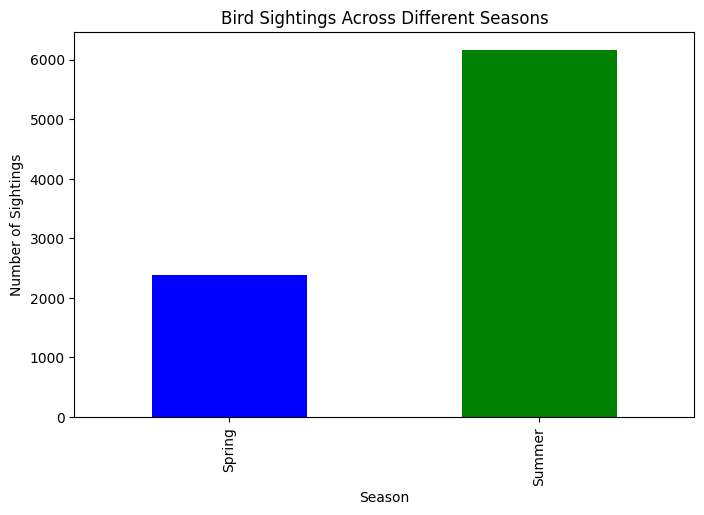

In [4]:
# 1. Temporal Analysis
forest_df["Month"] = forest_df["Date"].dt.month
forest_df["Year"] = forest_df["Date"].dt.year

# Define seasons based on months
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

forest_df["Season"] = forest_df["Month"].apply(get_season)

import matplotlib.pyplot as plt
import seaborn as sns

# Count bird sightings per season
seasonal_trends = forest_df.groupby("Season")["Common_Name"].count()

# Plot seasonal trends
plt.figure(figsize=(8, 5))
seasonal_trends.plot(kind="bar", color=["blue", "green", "red", "orange"])
plt.xlabel("Season")
plt.ylabel("Number of Sightings")
plt.title("Bird Sightings Across Different Seasons")
plt.show()


C:\Users\marve\AppData\Local\Temp\ipykernel_6568\498546841.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=biodiversity, x="Location_Type", y="Common_Name", palette="viridis")


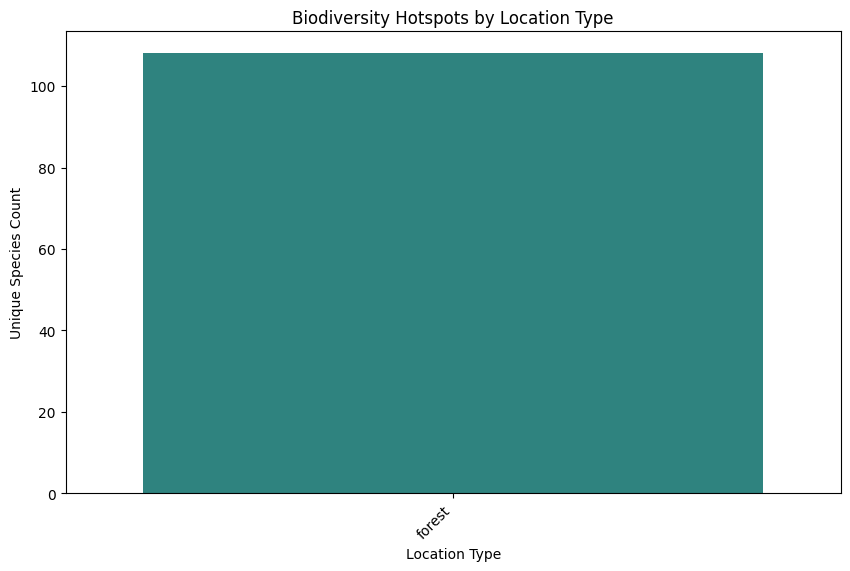

C:\Users\marve\AppData\Local\Temp\ipykernel_6568\498546841.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_analysis, x="Plot_Name", y="Common_Name", palette="mako")


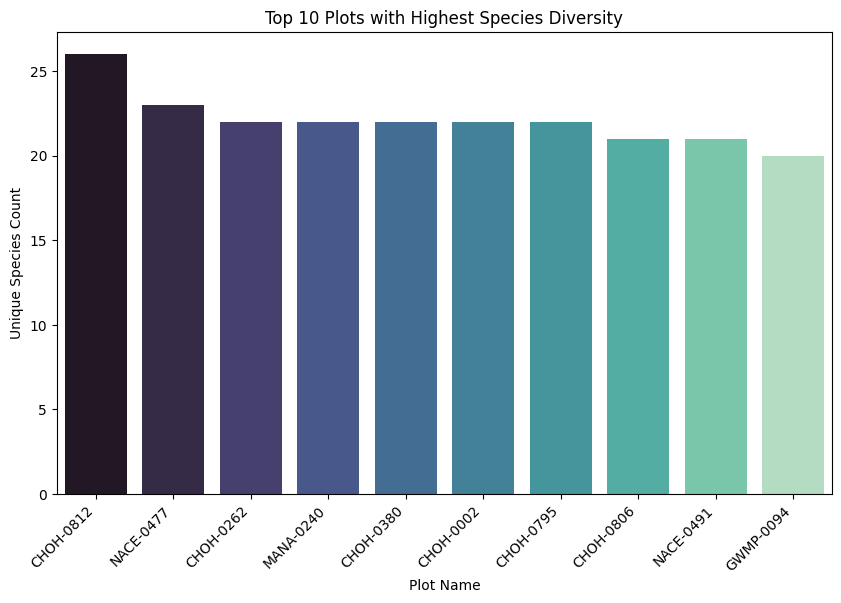

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Biodiversity Hotspots (Species count by Location_Type)
biodiversity = forest_df.groupby("Location_Type")["Common_Name"].nunique().reset_index()
biodiversity = biodiversity.sort_values(by="Common_Name", ascending=False)

# Visualization: Biodiversity Hotspots
plt.figure(figsize=(10, 6))
sns.barplot(data=biodiversity, x="Location_Type", y="Common_Name", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Location Type")
plt.ylabel("Unique Species Count")
plt.title("Biodiversity Hotspots by Location Type")
plt.show()

# 2. Plot-Level Analysis (Observations by Plot_Name)
plot_analysis = forest_df.groupby("Plot_Name")["Common_Name"].nunique().reset_index()
plot_analysis = plot_analysis.sort_values(by="Common_Name", ascending=False).head(10)  # Top 10 plots

# Visualization: Observations per Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_analysis, x="Plot_Name", y="Common_Name", palette="mako")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Plot Name")
plt.ylabel("Unique Species Count")
plt.title("Top 10 Plots with Highest Species Diversity")
plt.show()


C:\Users\marve\AppData\Local\Temp\ipykernel_6568\2101759570.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=species_diversity, x="Location_Type", y="Scientific_Name", palette="coolwarm")


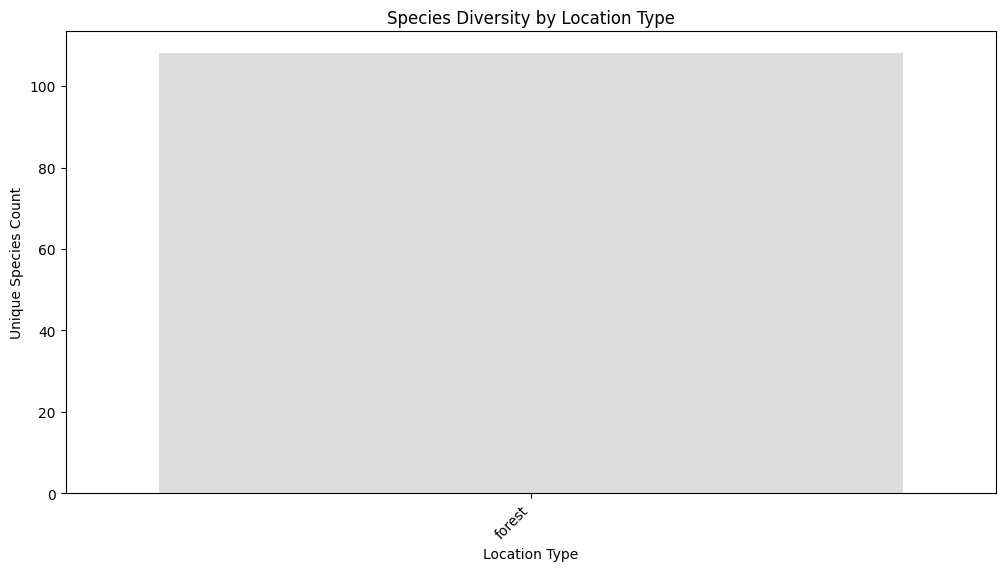

C:\Users\marve\AppData\Local\Temp\ipykernel_6568\2101759570.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=id_method_counts, x="ID_Method", y="Count", palette="viridis")


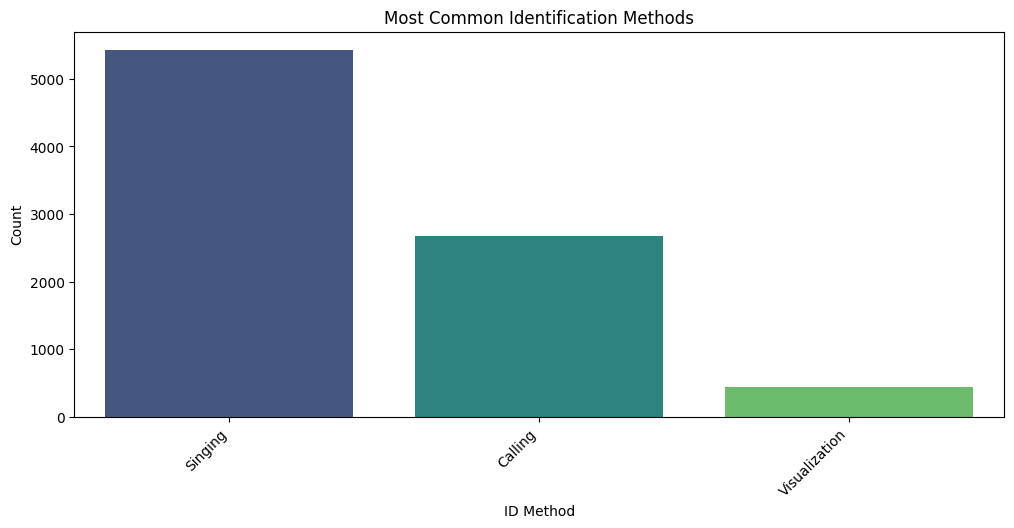

C:\Users\marve\AppData\Local\Temp\ipykernel_6568\2101759570.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=interval_length_counts, x="Interval_Length", y="Count", palette="magma")


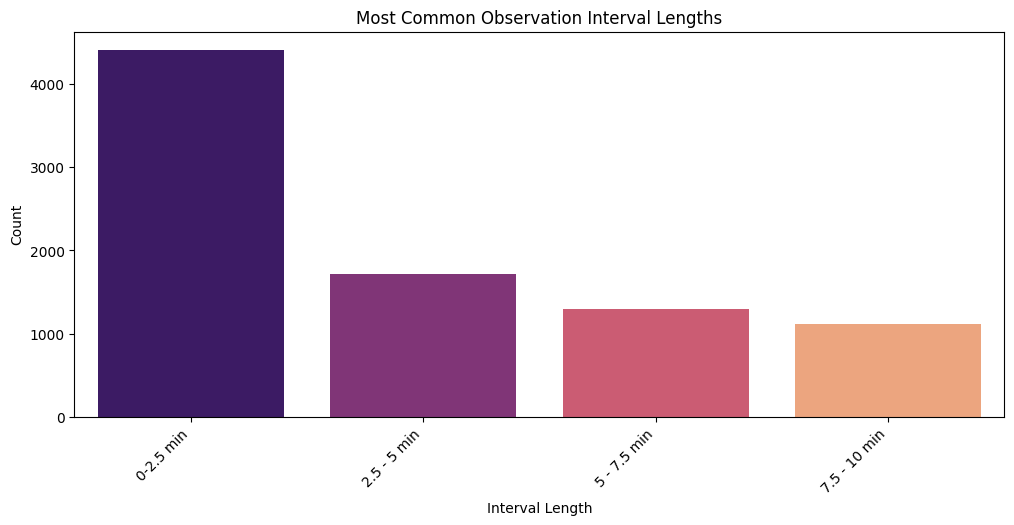

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Diversity Metrics - Unique species per Location_Type
species_diversity = forest_df.groupby("Location_Type")["Scientific_Name"].nunique().reset_index()
species_diversity = species_diversity.sort_values(by="Scientific_Name", ascending=False)

# Visualization: Species Diversity across Location Types
plt.figure(figsize=(12, 6))
sns.barplot(data=species_diversity, x="Location_Type", y="Scientific_Name", palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Location Type")
plt.ylabel("Unique Species Count")
plt.title("Species Diversity by Location Type")
plt.show()

## 2. Activity Patterns - Most Common ID Methods and Interval Lengths
id_method_counts = forest_df["ID_Method"].value_counts().reset_index()
id_method_counts.columns = ["ID_Method", "Count"]  # Rename columns properly

interval_length_counts = forest_df["Interval_Length"].value_counts().reset_index()
interval_length_counts.columns = ["Interval_Length", "Count"]

# Visualization: ID Methods
plt.figure(figsize=(12, 5))
sns.barplot(data=id_method_counts, x="ID_Method", y="Count", palette="viridis")
plt.xlabel("ID Method")
plt.ylabel("Count")
plt.title("Most Common Identification Methods")
plt.xticks(rotation=45, ha="right")
plt.show()

# Visualization: Interval Lengths
plt.figure(figsize=(12, 5))
sns.barplot(data=interval_length_counts, x="Interval_Length", y="Count", palette="magma")
plt.xlabel("Interval Length")
plt.ylabel("Count")
plt.title("Most Common Observation Interval Lengths")
plt.xticks(rotation=45, ha="right")
plt.show()



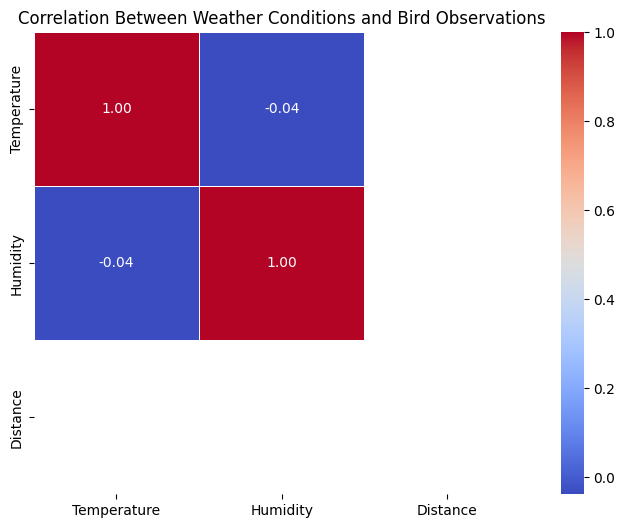

C:\Users\marve\AppData\Local\Temp\ipykernel_6568\3820063005.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=bird_counts_temp, x="Temperature", y="Bird_Count", alpha=0.5, palette="viridis")


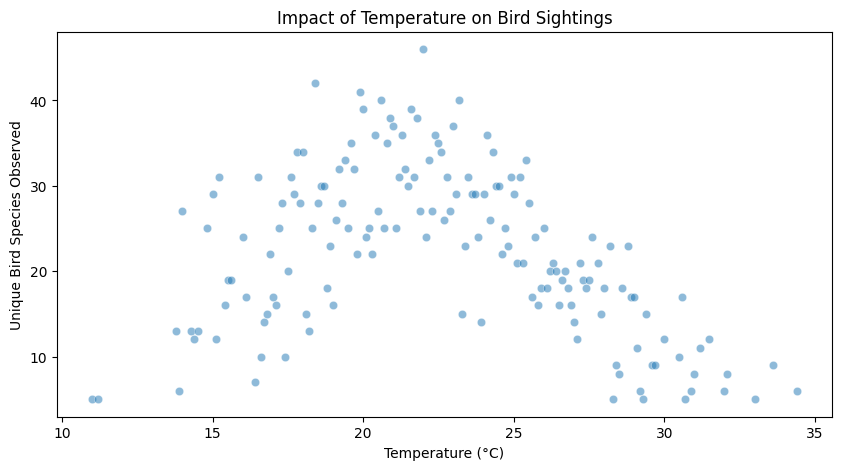

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the columns exist before processing
weather_cols = ["Temperature", "Humidity", "Distance"]
existing_cols = [col for col in weather_cols if col in forest_df.columns]

# Convert to numeric where possible
forest_df[existing_cols] = forest_df[existing_cols].apply(pd.to_numeric, errors='coerce')

# Aggregate bird counts per temperature level
bird_counts_temp = forest_df.groupby("Temperature")["Common_Name"].nunique().reset_index()
bird_counts_temp.columns = ["Temperature", "Bird_Count"]

# Compute correlation matrix (excluding Common_Name directly)
weather_corr = forest_df[existing_cols].corr()

# Heatmap: Correlation Between Weather Conditions and Bird Observations
plt.figure(figsize=(8, 6))
sns.heatmap(weather_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Weather Conditions and Bird Observations")
plt.show()

# Scatterplot: Temperature vs Bird Sightings
plt.figure(figsize=(10, 5))
sns.scatterplot(data=bird_counts_temp, x="Temperature", y="Bird_Count", alpha=0.5, palette="viridis")
plt.xlabel("Temperature (°C)")
plt.ylabel("Unique Bird Species Observed")
plt.title("Impact of Temperature on Bird Sightings")
plt.show()




C:\Users\marve\AppData\Local\Temp\ipykernel_6568\1839978932.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=flyover_counts, x="Flyover_Observed", y="Count", palette="coolwarm")


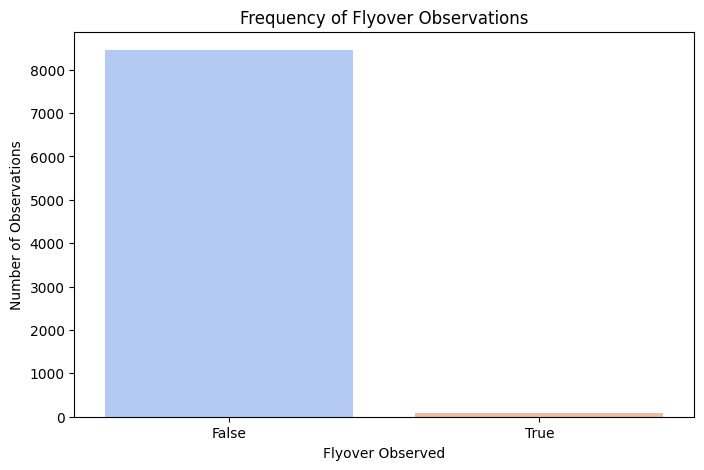

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 5. Distance and Behavior Analysis

# Flyover Frequency: Analyze trends in flyover observations
if "Flyover_Observed" in forest_df.columns:
    flyover_counts = forest_df["Flyover_Observed"].value_counts().reset_index()
    flyover_counts.columns = ["Flyover_Observed", "Count"]

    plt.figure(figsize=(8, 5))
    sns.barplot(data=flyover_counts, x="Flyover_Observed", y="Count", palette="coolwarm")
    plt.xlabel("Flyover Observed")
    plt.ylabel("Number of Observations")
    plt.title("Frequency of Flyover Observations")
    plt.show()


C:\Users\marve\AppData\Local\Temp\ipykernel_6568\827331123.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=observer_analysis, x="Observer", y="Unique_Species", palette="coolwarm")


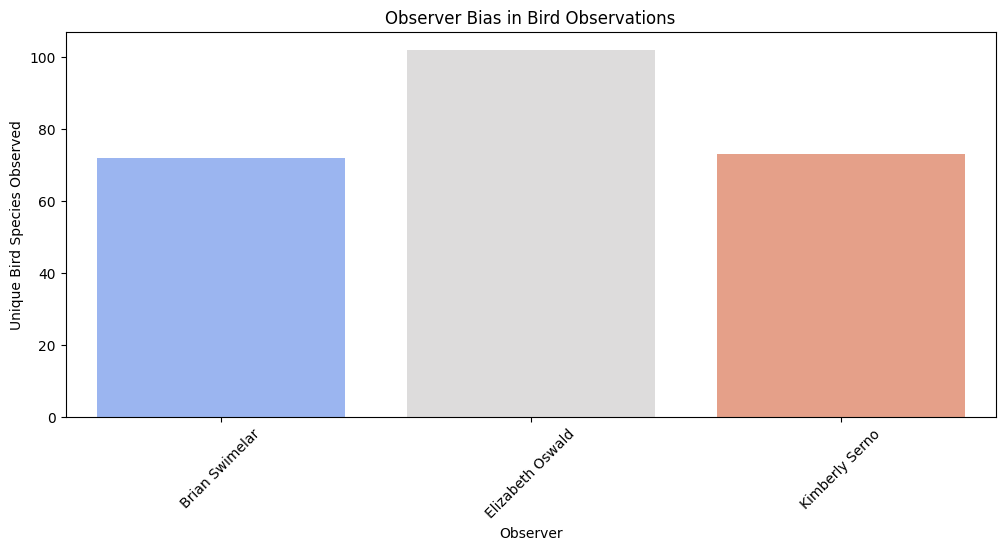

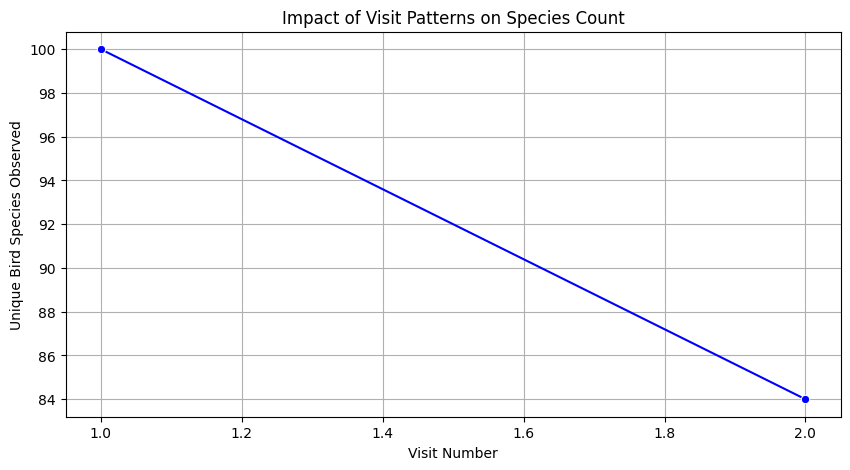

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Observer Bias: Count unique species observed by each observer
observer_analysis = forest_df.groupby("Observer")["Common_Name"].nunique().reset_index()
observer_analysis.columns = ["Observer", "Unique_Species"]

# Check if DataFrame is not empty
if not observer_analysis.empty:
    # Plot: Observer vs Unique Species Count
    plt.figure(figsize=(12, 5))
    sns.barplot(data=observer_analysis, x="Observer", y="Unique_Species", palette="coolwarm")
    plt.xlabel("Observer")
    plt.ylabel("Unique Bird Species Observed")
    plt.title("Observer Bias in Bird Observations")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No data available for observer analysis.")

# Visit Patterns: Count unique species observed per visit
visit_analysis = forest_df.groupby("Visit")["Common_Name"].nunique().reset_index()
visit_analysis.columns = ["Visit", "Unique_Species"]

# Check if DataFrame is not empty
if not visit_analysis.empty:
    # Plot: Visit vs Unique Species Count
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=visit_analysis, x="Visit", y="Unique_Species", marker="o", color="b")
    plt.xlabel("Visit Number")
    plt.ylabel("Unique Bird Species Observed")
    plt.title("Impact of Visit Patterns on Species Count")
    plt.grid(True)
    plt.show()
else:
    print("No data available for visit analysis.")


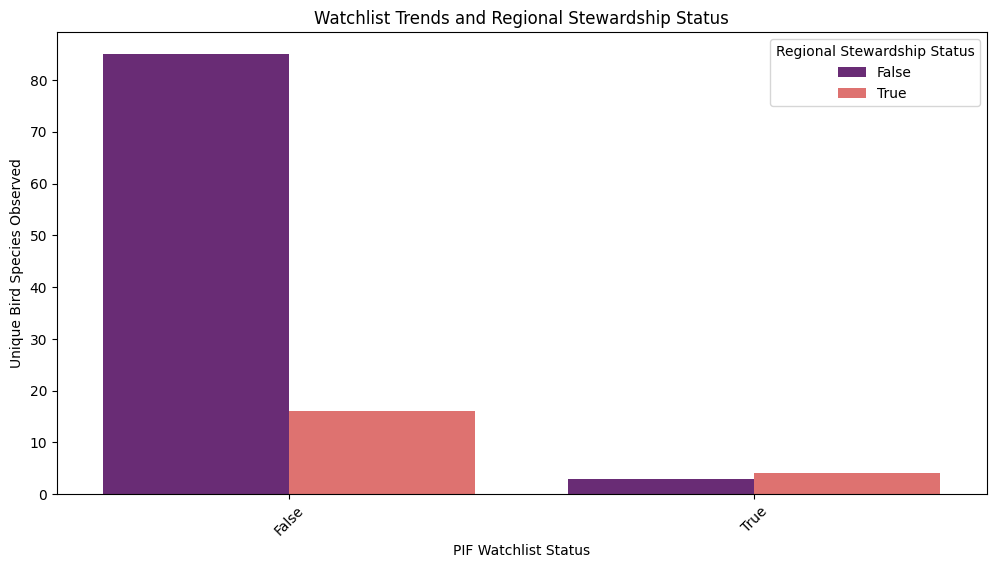

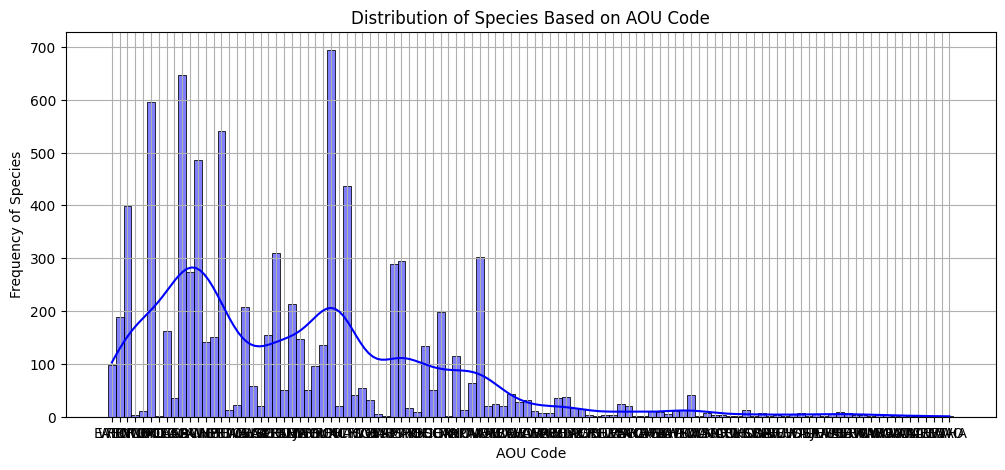

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Watchlist Trends: Count species based on PIF Watchlist and Regional Stewardship Status
if "PIF_Watchlist_Status" in forest_df.columns and "Regional_Stewardship_Status" in forest_df.columns:
    watchlist_counts = forest_df.groupby(["PIF_Watchlist_Status", "Regional_Stewardship_Status"])["Common_Name"].nunique().reset_index()
    watchlist_counts.columns = ["PIF_Watchlist_Status", "Regional_Stewardship_Status", "Unique_Species"]

    plt.figure(figsize=(12, 6))
    sns.barplot(data=watchlist_counts, x="PIF_Watchlist_Status", y="Unique_Species", hue="Regional_Stewardship_Status", palette="magma")
    plt.xlabel("PIF Watchlist Status")
    plt.ylabel("Unique Bird Species Observed")
    plt.title("Watchlist Trends and Regional Stewardship Status")
    plt.xticks(rotation=45)
    plt.legend(title="Regional Stewardship Status")
    plt.show()
else:
    print("PIF_Watchlist_Status or Regional_Stewardship_Status columns are missing.")

# 2. AOU Code Patterns: Analyze species distribution based on AOU Code
if "AOU_Code" in forest_df.columns:
    plt.figure(figsize=(12, 5))
    sns.histplot(forest_df["AOU_Code"].dropna(), bins=30, kde=True, color="b")
    plt.xlabel("AOU Code")
    plt.ylabel("Frequency of Species")
    plt.title("Distribution of Species Based on AOU Code")
    plt.grid(True)
    plt.show()
else:
    print("AOU_Code column is missing.")


Data Visualization

In [11]:
import plotly.express as px

fig = px.histogram(forest_df, x="Common_Name", title="Most Observed Bird Species",
                   category_orders={"Common_Name": forest_df["Common_Name"].value_counts().index[:20]})
fig.show()


In [12]:
import plotly.figure_factory as ff

heatmap_data = forest_df.pivot_table(index="Year", columns="Month", values="Common_Name", aggfunc="count")

fig = ff.create_annotated_heatmap(
    z=heatmap_data.values, 
    x=list(heatmap_data.columns), 
    y=list(heatmap_data.index),
    annotation_text=heatmap_data.values.astype(str),
    colorscale="Viridis"
)
fig.show()


Store Data in SQL Database

In [16]:
# Importing required Libraries
import pandas as pd
from sqlalchemy import create_engine, text

# Defining the connection parameters
db_user = "postgres"
db_password = "190701"
db_host = "localhost"
db_port = 5432
db_name = "Birds_Observations"

# Formating the connection string
engine_string = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

# Creating the SQLAlchemy engine
engine = create_engine(engine_string)

from sqlalchemy import create_engine

# Pushing the data to PostgreSQL
# Inserting the Forest data
forest_df.to_sql('forest', engine, if_exists='replace', index=False)
print("Forest data inserted into PostgreSQL.")


Forest data inserted into PostgreSQL.
